In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial import ConvexHull
from myConvexHull import myConvexHull

In [2]:
data = datasets.load_iris() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
print(df)

(150, 5)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Target  
0   

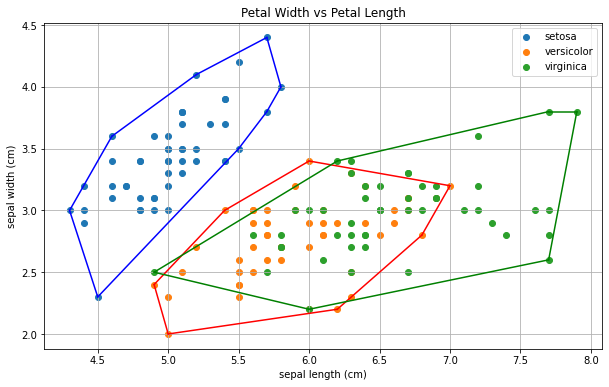

In [3]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
  hull = ConvexHull(bucket) 
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

  for simplex in hull.simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])

plt.grid()
plt.legend()


In [4]:
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
  # hull = ConvexHull(bucket) 
  # print(hull.simplices)
  hull = myConvexHull(bucket)
  print("Ini Hull")
  print(hull)

Ini Hull
[[4.3, 3.0], [5.8, 4.0], [5.2, 4.1], [4.6, 3.6], [5.7, 4.4], [4.5, 2.3], [5.5, 3.5], [5.7, 3.8]]
Ini Hull
[[4.9, 2.4], [7.0, 3.2], [6.0, 3.4], [5.4, 3.0], [6.2, 2.2], [6.8, 2.8], [5.0, 2.0]]
Ini Hull
[[4.9, 2.5], [7.9, 3.8], [6.2, 3.4], [7.7, 3.8], [7.7, 2.6], [6.0, 2.2]]


In [5]:
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
  hull = ConvexHull(bucket) 
  print(hull.simplices)

[[41 13]
 [36 41]
 [22 13]
 [22 32]
 [15 14]
 [15 32]
 [18 14]
 [18 36]]
[[35  0]
 [34  7]
 [34 35]
 [10  7]
 [10 18]
 [26  0]
 [26 18]]
[[19  6]
 [18 31]
 [18 19]
 [48  6]
 [17 31]
 [17 48]]
